In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [3]:
with open('price.pickle','rb') as f:
    results = pickle.load(f)

In [4]:
len(results)

2115

In [6]:
itemList = [item for item in results if len(items.getQuants(item))>0 and np.mean(items.getQuants(item)[-7:])>100 and np.median(items.getPrices(item)[-7:])>100]
print(len(itemList))
for item in list(results.keys()):
    if item not in itemList:
        results.pop(item)

1064


In [7]:
results['Abyssal_whip'].keys()

dict_keys(['model_opt', 'buyAndHold', 'testPrices', 'momentum_model', 'perfect', 'startLoss', 'sma', 'predictions', 'numPrices', 'sma_model', 'stochOscil', 'momentum', 'numItems', 'item', 'persist', 'numEpochs', 'model', 'endLoss', 'startMAE', 'endMAE', 'opt_params', 'stochOscil_model'])

In [8]:
sma = [(item,results[item]['sma']) for item in results]
sma = sorted(sma, key=lambda x: x[1], reverse=True)

sma_model = [(item,results[item]['sma_model']) for item in results]
sma_model = sorted(sma_model, key=lambda x: x[1], reverse=True)

In [27]:
m = [a[1] for a in sma]
print(np.mean(m),np.median(m),np.std(m),max(m),min(m))
mm = [a[1] for a in sma_model]
print(np.mean(mm),np.median(mm),np.std(mm),max(mm),min(mm))

0.05646042707329408 -0.026782525510204082 0.6335685039421967 16.80952380952381 -0.7594241235736312
-0.007275101654784254 -0.05593253146133672 0.6216334721067499 17.432900432900432 -0.7568916172855296


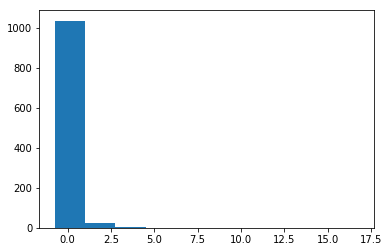

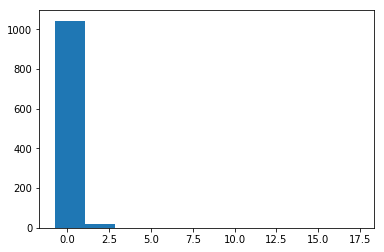

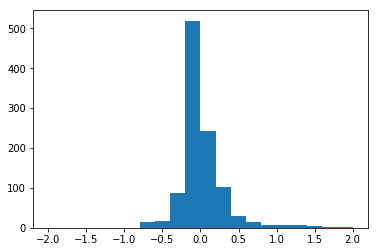

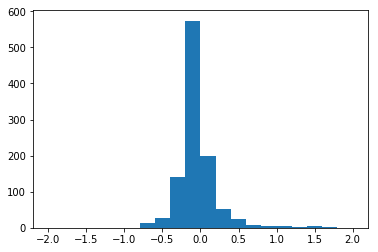

In [11]:
plt.hist([a[1] for a in sma])
plt.show()
plt.hist([a[1] for a in sma_model])
plt.show()
plt.hist([a[1] for a in sma],20,range=(-2,2))
plt.show()
plt.hist([a[1] for a in sma_model],20,range=(-2,2))
plt.show()

In [12]:
numSMA = len([a for a in sma if a[1]>0])
numSMA_model = len([a for a in sma_model if a[1]>0])

In [13]:
print(len(results))
print(numSMA/len(results))
print(numSMA_model/len(results))

1064
0.3994360902255639
0.2894736842105263


In [14]:
stochOscil = [(item,results[item]['stochOscil']) for item in results]
stochOscil = sorted(stochOscil, key=lambda x: x[1], reverse=True)

stochOscil_model = [(item,results[item]['stochOscil_model']) for item in results]
stochOscil_model = sorted(stochOscil_model, key=lambda x: x[1], reverse=True)

In [26]:
m = [a[1] for a in stochOscil]
print(np.mean(m),np.median(m),np.std(m),max(m),min(m))
mm = [a[1] for a in stochOscil_model]
print(np.mean(mm),np.median(mm),np.std(mm),max(mm),min(mm))

0.04769567246506829 -0.01261352523940897 0.5798132113058402 15.60099567099567 -0.8633502637233835
-0.012706699429382618 -0.04691254306917364 0.5208850171024155 13.560627705627706 -0.8935026372338347


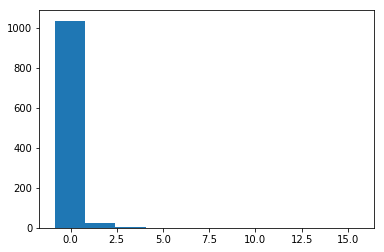

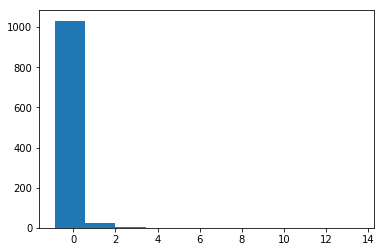

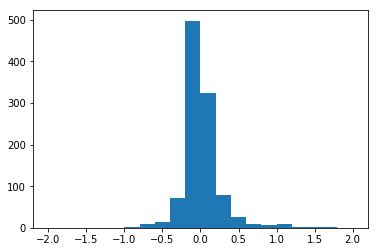

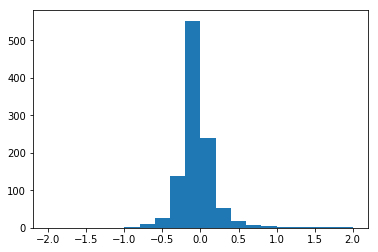

In [17]:
plt.hist([a[1] for a in stochOscil])
plt.show()
plt.hist([a[1] for a in stochOscil_model])
plt.show()
plt.hist([a[1] for a in stochOscil],20,range=(-2,2))
plt.show()
plt.hist([a[1] for a in stochOscil_model],20,range=(-2,2))
plt.show()

In [18]:
numstochOscil = len([a for a in stochOscil if a[1]>0])
numstochOscil_model = len([a for a in stochOscil_model if a[1]>0])

In [19]:
print(len(results))
print(numstochOscil/len(results))
print(numstochOscil_model/len(results))

1064
0.43890977443609025
0.3148496240601504


In [20]:
momentum = [(item,results[item]['momentum']) for item in results]
momentum = sorted(momentum, key=lambda x: x[1], reverse=True)

momentum_model = [(item,results[item]['momentum_model']) for item in results]
momentum_model = sorted(momentum_model, key=lambda x: x[1], reverse=True)

In [25]:
m = [a[1] for a in momentum]
print(np.mean(m),np.median(m),np.std(m),max(m),min(m))
mm = [a[1] for a in momentum_model]
print(np.mean(mm),np.median(mm),np.std(mm),max(mm),min(mm))

0.07584374774432354 -0.009455703833994984 0.5996315519433418 15.84034632034632 -0.7638425473725337
0.009331649866239928 -0.040513003702113116 0.5855306894000364 15.957604617604616 -0.79935143582731


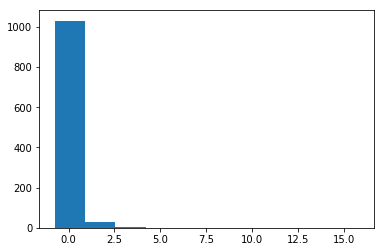

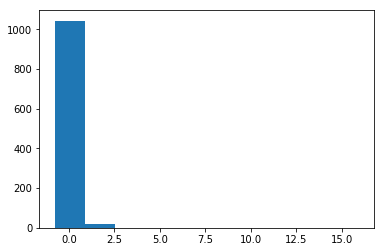

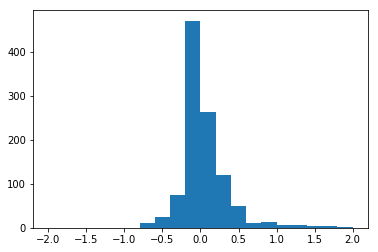

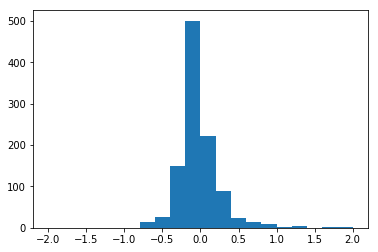

In [21]:
plt.hist([a[1] for a in momentum])
plt.show()
plt.hist([a[1] for a in momentum_model])
plt.show()
plt.hist([a[1] for a in momentum],20,range=(-2,2))
plt.show()
plt.hist([a[1] for a in momentum_model],20,range=(-2,2))
plt.show()

In [22]:
nummomentum = len([a for a in momentum if a[1]>0])
nummomentum_model = len([a for a in momentum_model if a[1]>0])

In [23]:
print(len(results))
print(nummomentum/len(results))
print(nummomentum_model/len(results))

1064
0.45394736842105265
0.35150375939849626


In [18]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['sma'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [19]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.014934481683761058
bl,price -0.05144175220748756
prof,pers 0.47587307924154965
profs,perf -0.05498265011497731
profs,bah 0.6237613281138139
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.20196197099505825
profdiff,mae 0.05915224955947585


In [20]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['sma_model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [21]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.008783465227588003
bl,price -0.05144175220748756
prof,pers 0.4141202539756858
profs,perf -0.037826043961764075
profs,bah 0.6035232503673789
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.1831468812431142
profdiff,mae 0.05915224955947585


In [22]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['stochOscil'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [23]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.004253726075931554
bl,price -0.05144175220748756
prof,pers 0.3215644585190623
profs,perf -0.021005981111603306
profs,bah 0.5270249527111416
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.13347610042911615
profdiff,mae 0.05915224955947585


In [24]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['stochOscil_model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [25]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.003568646506356578
bl,price -0.05144175220748756
prof,pers 0.2668045636793476
profs,perf 0.02007940565081238
profs,bah 0.6746931048915382
profdiff,mae 0.05915224955947585
prices,mae -0.007226992000329215
profs,mae -0.09946470874317608
profdiff,mae 0.05915224955947585
